In [27]:
from _tests import scripts
from scripts import utils, notebook_utils
import numpy as np
import matplotlib.pyplot as plt

MACRO_NAME = "flexdcim_2025"

# Model of "FlexDCIM: A 400 MHz 249.1 TOPS/W 64 Kb Flexible Digital Compute-in-Memory SRAM Macro for CNN Acceleration"

Paper by Vishal Sharma, Xin Zhang, Narendra Singh Dhakad, and Tony Tae-Hyoung Kim

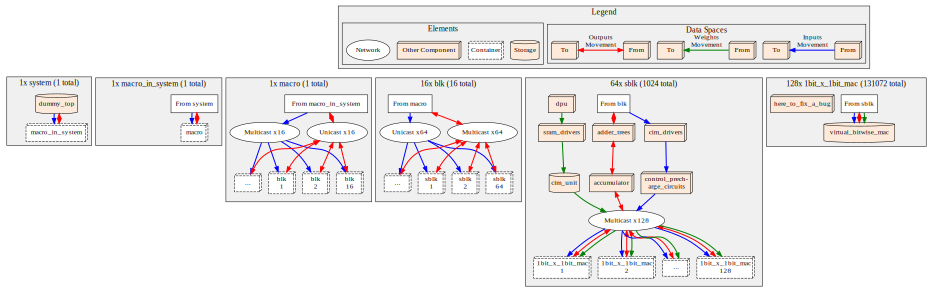

In [28]:
notebook_utils.display_diagram(notebook_utils.get_diagram(
    "flexdcim_2025",
    # ignore=DIAGRAM_DEFAULT_IGNORE,
))

In [3]:
# utils.get_spec(
#     macro=MACRO_NAME
# )

In [29]:
# TODO: check that these components are in the correct sections

# used for area and power breakdowns
memory_components = ["dpu", "cim_unit"]
adder_tree_components = ["adder_trees"]
ctrl_components = ["control_precharge_circuits", "accumulator"]
cim_drv_components = ["cim_drivers"]
wl_drv_components = ["sram_drivers"]

## Area Breakdown

This test replicates the results presented in Fig. 24 of the paper.

We show the area breakdown of the macro. The area is broken down into the following parts:
* Memory: <TODO: explanation of part>
* Adder Tree: <TODO: explanation of part>
* Control (CTRL): <TODO: explanation of part>
* CiM Driver: <TODO: explanation of part>
* WL Driver: <TODO: explanation of part>

<TODO: brief analysis of results>
* memory/bitcell array consumes the most memory
* adder tree second most

---

From Table VI:
* macro area: 0.3136 mm^2 (313,600 µm^2)
* bit-cell area: 2.3452 µm^2

Targets:
* Memory: 52.85%
* Adder Tree: 34.72%
* CTRL: 4.38%
* CIM_DRV: 4.45%
* WL_DRV: 3.60%

In [30]:
# TODO: start moving all evaluation code into _tests.py?

macro_area = 313_600e-12 # 313,600 µm^2

results = utils.single_test(
    utils.quick_run(
        macro=MACRO_NAME,
        variables=dict(
            MAX_UTILIZATION=True,
            # INPUT_BITS=1,
            # WEIGHT_BITS=8,
            # OUTPUT_BITS=16,
            # FORCE_100MHZ=True,
        ),
    )
)

In [31]:
[x for x in results[0].per_component_area.items() if x[1] > 0]

[('dpu', 1.0937446400000001e-07),
 ('adder_trees', 1.19317504e-07),
 ('sram_drivers', 4.38593536e-09),
 ('cim_drivers', 5.48241408e-09),
 ('control_precharge_circuits', 1.694976e-09),
 ('accumulator', 3.049216e-08),
 ('cim_unit', 1.3844479999999999e-08)]

In [32]:
results.combine_per_component_area(memory_components, "Memory")
results.add_compare_ref_area("Memory", 0.5285 * macro_area)
results.combine_per_component_area(adder_tree_components, "Adder Tree")
results.add_compare_ref_area("Adder Tree", 0.3472 * macro_area)
results.combine_per_component_area(ctrl_components, "CTRL")
results.add_compare_ref_area("CTRL", 0.0438 * macro_area)
results.combine_per_component_area(cim_drv_components, "CIM_DRV")
results.add_compare_ref_area("CIM_DRV", 0.0445 * macro_area)
results.combine_per_component_area(wl_drv_components, "WL_DRV")
results.add_compare_ref_area("WL_DRV", 0.0360 * macro_area)
# results.clear_zero_areas()

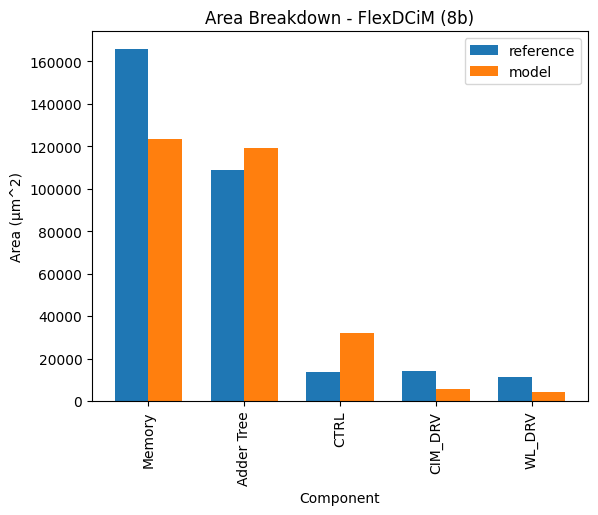

In [33]:
notebook_utils.bar_side_by_side(
    results[0].get_compare_ref_area()*1e12,
    xlabel="Component",
    ylabel="Area (µm^2)",
    title="Area Breakdown - FlexDCiM (8b)",
)

## Power Breakdown

This test replicates the results presented in Fig. 24 of the paper.

We show the power breakdown of the macro. The power is broken down into the following parts:
* Memory: <TODO: explanation of part>
* Adder Tree: <TODO: explanation of part>
* Control (CTRL): <TODO: explanation of part>
* CiM Driver: <TODO: explanation of part>

Notably, the power contribution of the WL Driver is 0.0% because, as stated in the paper, "for CIM mode, the CIM Driver module controls the wordlines. Hence the power consumption of the WL driver has been considered under the CIM driver block."

<TODO: brief analysis of results>
* ctrl is the most
* adder tree and memory follow

---

Targets:
* Memory: 19.4%
* Adder Tree: 23.8%
* CTRL: 44.0%
* CIM_DRV: 12.8%
* WL_DRV: 0.0%, "For CIM mode, the CIM Driver
module controls the wordlines. Hence the power consumption
of the WL driver has been considered under the CIM driver
block."

In [77]:
results = utils.single_test(
    utils.quick_run(
        macro=MACRO_NAME,
        variables=dict(
            MAX_UTILIZATION=True,
            # INPUT_BITS=1,
            # WEIGHT_BITS=8,
            # OUTPUT_BITS=16,
            # FORCE_100MHZ=True,
        ),
    )
)

In [78]:
[x for x in results[0].per_component_energy.items() if x[1] > 0]

[('cim_unit', 2.13909504e-14),
 ('accumulator', 1.0905190399999999e-12),
 ('control_precharge_circuits', 2.9360128e-12),
 ('cim_drivers', 1.2582912e-12),
 ('sram_drivers', 1.56237824e-24),
 ('adder_trees', 1.79306496e-11),
 ('dpu', 1.69869312e-11)]

In [79]:
# measured by pJ/full array of MACs, so multiply all by 512 x 128 (?)
total_energy = .0006

results.combine_per_component_energy(memory_components, "Memory")
results.add_compare_ref_energy("Memory", 0.194 * total_energy * 512 * 128 * 1e-12)
results.combine_per_component_energy(adder_tree_components, "Adder Tree")
results.add_compare_ref_energy("Adder Tree", 0.238 * total_energy * 512 * 128 * 1e-12)
results.combine_per_component_energy(ctrl_components, "CTRL")
results.add_compare_ref_energy("CTRL", 0.440 * total_energy * 512 * 128 * 1e-12)
results.combine_per_component_energy(cim_drv_components, "CIM_DRV")
results.add_compare_ref_energy("CIM_DRV", 0.128 * total_energy * 512 * 128 * 1e-12)
results.combine_per_component_energy(wl_drv_components, "WL_DRV")
results.add_compare_ref_energy("WL_DRV", 0)

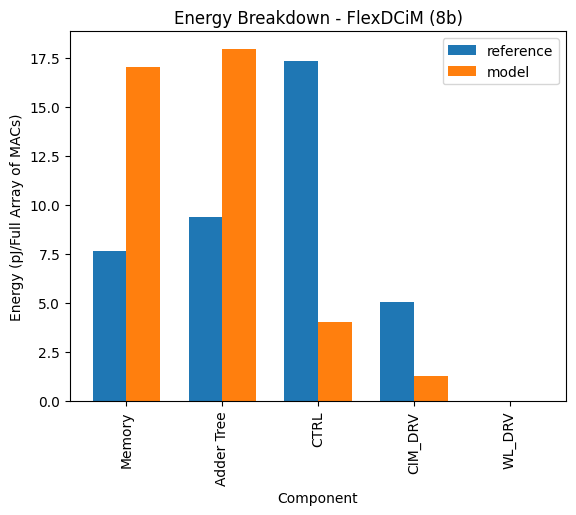

Energy Breakdown Comparison (pJ/Full Array of MACs):
Component       Reference       Model           Ratio (Model/Ref)
------------------------------------------------------------
Memory          7.63            17.01           2.2296         
Adder Tree      9.36            17.93           1.9160         
CTRL            17.30           4.03            0.2327         
CIM_DRV         5.03            1.26            0.2500         
WL_DRV          0.00            0.00            inf            
------------------------------------------------------------
TOTAL           39.32           40.22           1.0229         


In [80]:
notebook_utils.bar_side_by_side(
    results[0].get_compare_ref_energy()*1e12,
    xlabel="Component",
    ylabel="Energy (pJ/Full Array of MACs)",
    title="Energy Breakdown - FlexDCiM (8b)",
)

# GPT script for printing the actual values to debug
# Print reference and model values for comparison
print("Energy Breakdown Comparison (pJ/Full Array of MACs):")
print("{:<15} {:<15} {:<15} {:<15}".format("Component", "Reference", "Model", "Ratio (Model/Ref)"))
print("-" * 60)

energy_data = results[0].get_compare_ref_energy() * 1e12  # Convert to pJ
for component in energy_data:
    ref_value = energy_data[component]["reference"]
    model_value = energy_data[component]["model"] if "model" in energy_data[component] else 0
    ratio = model_value / ref_value if ref_value > 0 else float('inf')
    print("{:<15} {:<15.2f} {:<15.2f} {:<15.4f}".format(component, ref_value, model_value, ratio))

# Calculate total energy
total_ref = sum([energy_data[comp]["reference"] for comp in energy_data])
total_model = sum([energy_data[comp]["model"] if "model" in energy_data[comp] else 0 for comp in energy_data])
total_ratio = total_model / total_ref if total_ref > 0 else float('inf')
print("-" * 60)
print("{:<15} {:<15.2f} {:<15.2f} {:<15.4f}".format("TOTAL", total_ref, total_model, total_ratio))

## Energy Efficiency

This test replicates the results presented in Fig. 23 of the paper.

---

Measured in TOPS/W

100%|██████████| 7/7 [00:09<00:00,  1.42s/it]


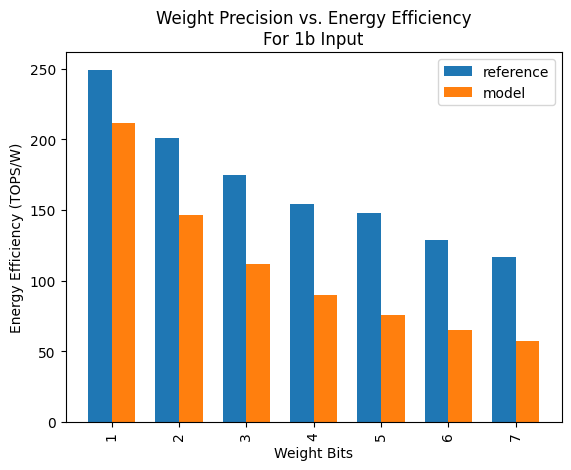

In [81]:
EXPECTED_EFFICIENCY_1b_INPUT = {
    1: 249.1,
    2: 201.0,
    3: 175.0,
    4: 153.9,
    5: 148.0,
    6: 129.0,
    7: 117.0,
    8: 110.7,
}

results = utils.parallel_test(
    utils.delayed(utils.quick_run)(
        macro=MACRO_NAME,
        variables=dict(
            MAX_UTILIZATION=True,
            WEIGHT_BITS=i,
            INPUT_BITS=1,
        ),
    )
    for i in range(1, 8)
)

expected_flattened = list(EXPECTED_EFFICIENCY_1b_INPUT.values())
for r, e in zip(results, expected_flattened):
    r.add_compare_ref("tops_per_w", e)

notebook_utils.bar_side_by_side(
    {r.variables["WEIGHT_BITS"]: r.tops_per_w for r in results},
    # ax=axs[i],
    xlabel="Weight Bits",
    ylabel="Energy Efficiency (TOPS/W)",
    title=f"Weight Precision vs. Energy Efficiency\nFor 1b Input",
)

100%|██████████| 7/7 [00:08<00:00,  1.26s/it]


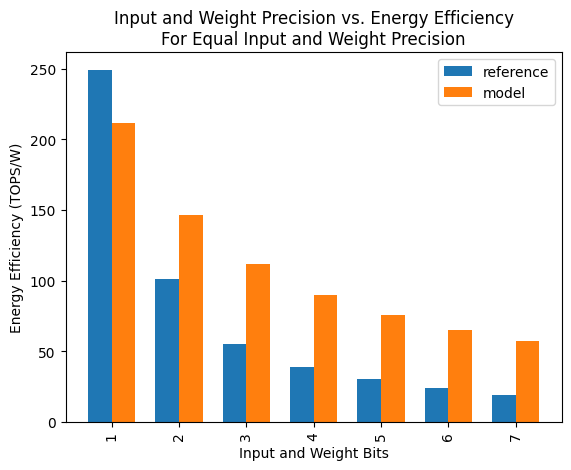

In [82]:
EXPECTED_EFFICIENCY_SCALED_INPUT = {
    1: 249.1,
    2: 101.0,
    3: 55.0,
    4: 38.5,
    5: 30.0,
    6: 24.0,
    7: 19.0,
    8: 13.84,
}

results = utils.parallel_test(
    utils.delayed(utils.quick_run)(
        macro=MACRO_NAME,
        variables=dict(
            MAX_UTILIZATION=True,
            INPUT_BITS=i,
            WEIGHT_BITS=i,
        ),
    )
    for i in range(1, 8)
)

expected_flattened = list(EXPECTED_EFFICIENCY_SCALED_INPUT.values())
for r, e in zip(results, expected_flattened):
    r.add_compare_ref("tops_per_w", e)

notebook_utils.bar_side_by_side(
    {r.variables["WEIGHT_BITS"]: r.tops_per_w for r in results},
    # ax=axs[i],
    xlabel="Input and Weight Bits",
    ylabel="Energy Efficiency (TOPS/W)",
    title=f"Input and Weight Precision vs. Energy Efficiency\nFor Equal Input and Weight Precision",
)

In [66]:
i = 4

print(results[i].variables["WEIGHT_BITS"])
print(results[i].variables["INPUT_BITS"])
print(results[i].tops_per_w)

5
1
{'reference': 148.0, 'model': 75.52570725897077}


## Throughput

This test replicates the results presented in Table V of the paper.

---

Target: 819.2 GOPS

Test at 400 MHz

In [40]:
results = utils.parallel_test(
    utils.delayed(utils.quick_run)(
        macro=MACRO_NAME,
        variables=dict(
            MAX_UTILIZATION=True,
            WEIGHT_BITS=i,
            INPUT_BITS=j,
            # N_REGS_PER_COL=[1, 2, 4, 8, 16][j],
            # N_ROWS_PER_REG=128 // [1, 2, 4, 8, 16][j],
            # FORCE_100MHZ=False,
            # OUTPUT_BITS=16,
        ),
    )
    for i in (1, 8)
    for j in (1, 8)
)

# add attributes for GOPS, computed from results TOPS
for r in results:
    r.gops = r.tops * 1e3

100%|██████████| 4/4 [00:05<00:00,  1.47s/it]


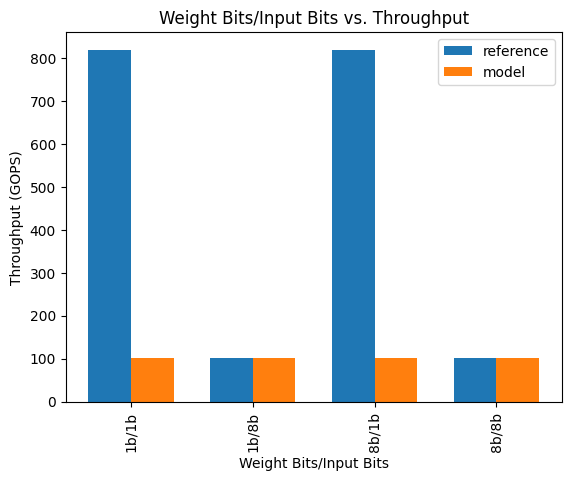

In [41]:
EXPECTED_THROUGHPUT = {
    # 1b~8b Weight /1b~8b Input
    "1b/1b": 819.2,
    "1b/8b": 102.4,
    "8b/1b": 819.2,
    "8b/8b": 102.4,
}

expected_flattened = list(EXPECTED_THROUGHPUT.values())
for r, e in zip(results, expected_flattened):
    r.add_compare_ref("gops", e)

notebook_utils.bar_side_by_side(
    {
        "1b/1b": results[0].gops,
        "1b/8b": results[1].gops,
        "8b/1b": results[2].gops,
        "8b/8b": results[3].gops,
    }, # TOPS -> GOPS
    # ax=axs[i],
    xlabel="Weight Bits/Input Bits",
    ylabel="Throughput (GOPS)",
    title=f"Weight Bits/Input Bits vs. Throughput",
)

100%|██████████| 8/8 [00:06<00:00,  1.16it/s]


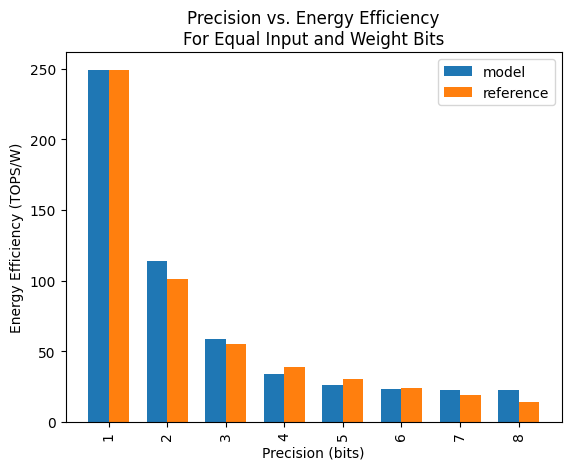

Calculated TOPS/W values (1-8 bit equal precision):
Precision: 1-bit, TOPS/W: 249.10, Reference: 249.1
Precision: 2-bit, TOPS/W: 113.51, Reference: 101.0
Precision: 3-bit, TOPS/W: 58.31, Reference: 55.0
Precision: 4-bit, TOPS/W: 33.99, Reference: 38.5
Precision: 5-bit, TOPS/W: 25.76, Reference: 30.0
Precision: 6-bit, TOPS/W: 23.53, Reference: 24.0
Precision: 7-bit, TOPS/W: 22.75, Reference: 19.0
Precision: 8-bit, TOPS/W: 22.26, Reference: 13.84


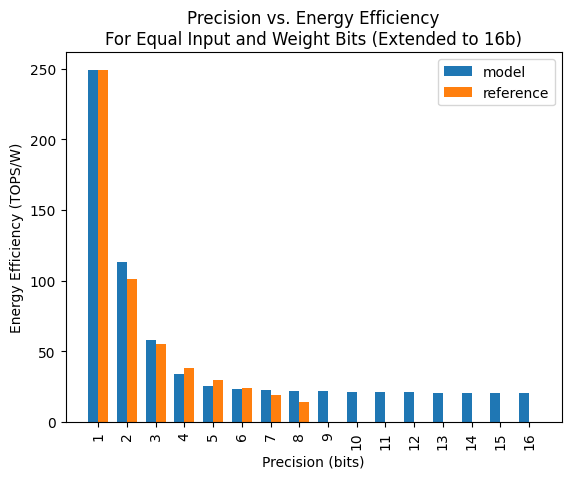


Calculated TOPS/W values (1-16 bit equal precision):
Precision: 1-bit, TOPS/W: 249.10, Reference: 249.1
Precision: 2-bit, TOPS/W: 113.51, Reference: 101.0
Precision: 3-bit, TOPS/W: 58.31, Reference: 55.0
Precision: 4-bit, TOPS/W: 33.99, Reference: 38.5
Precision: 5-bit, TOPS/W: 25.76, Reference: 30.0
Precision: 6-bit, TOPS/W: 23.53, Reference: 24.0
Precision: 7-bit, TOPS/W: 22.75, Reference: 19.0
Precision: 8-bit, TOPS/W: 22.26, Reference: 13.84
Precision: 9-bit, TOPS/W: 21.86, Reference: 0.0
Precision: 10-bit, TOPS/W: 21.53, Reference: 0.0
Precision: 11-bit, TOPS/W: 21.23, Reference: 0.0
Precision: 12-bit, TOPS/W: 20.97, Reference: 0.0
Precision: 13-bit, TOPS/W: 20.74, Reference: 0.0
Precision: 14-bit, TOPS/W: 20.53, Reference: 0.0
Precision: 15-bit, TOPS/W: 20.34, Reference: 0.0
Precision: 16-bit, TOPS/W: 20.16, Reference: 0.0


In [110]:
# DONT USE THIS ONE
EXPECTED_EFFICIENCY_SCALED_INPUT = {
    1: 249.1,
    2: 101.0,
    3: 55.0,
    4: 38.5,
    5: 30.0,
    6: 24.0,
    7: 19.0,
    8: 13.84,
}

# function to calculate TOPS/W based on the FlexDCIM architecture components
def calculate_tops_per_w(weight_bits, input_bits):
    
    """Calculate energy efficiency in TOPS/W based on weight and input bits."""
    # Array structure from the architecture definition
    array_inputs = 64
    array_outputs = 16
    
    # Each MAC consists of 2 operations (multiply and accumulate)
    ops_per_mac = 2 * input_bits * weight_bits
    
    # Total MACs per cycle
    macs_per_cycle = array_inputs * array_outputs
    
    # Total operations per cycle
    ops_per_cycle = ops_per_mac * macs_per_cycle
    
    # section V.B. claims elaborates on frequency/throughput as a function of number of serial input bits
    if input_bits <= 1:
        frequency = 400e6  # 400 MHz for 1b input
    else:
        # Scale frequency based on bit precision
        frequency = 400e6 * (1/input_bits)**0.5
        # Apply floor of 50 MHz for higher precisions
        # frequency = max(frequency, 50e6)
    
    # Operations per second
    ops_per_second = ops_per_cycle * frequency
    tops = ops_per_second / 1e12  # Convert to TOPS
    
    # --- Energy model based on architectural components ---
    
    # Component energy scaling based on FlexDCIM architecture
    
    # 1. Memory energy - scales with weight bits
    memory_scale = 0.194 * np.sqrt(weight_bits) * weight_bits
    
    # 2. Adder tree energy - scales with computation complexity
    adder_scale = 0.238 * weight_bits * input_bits * (1 + 0.05 * (weight_bits - 1))
    
    # 3. Control energy - scales with input precision
    control_scale = 0.440 * input_bits * (1 + 0.1 * np.log2(weight_bits + 1))
    
    # 4. Driver energy - scales with interconnect complexity
    driver_scale = 0.128 * weight_bits * input_bits * (1 + 0.03 * (weight_bits + input_bits - 2))
    
    # Combined energy model
    relative_energy = memory_scale + adder_scale + control_scale + driver_scale
    
    # Base efficiency at 1b/1b precision 
    base_efficiency = 249.1  # TOPS/W at 1b/1b from reference
    
    # Calculate efficiency using a compound scaling function
    
    # For equal precision on inputs and weights:
    precision_product = input_bits * weight_bits
    
    # Power law component - models core precision scaling
    power_exponent = 0.5 + 0.04 * precision_product
    power_law = 1.0 / (precision_product ** power_exponent)
    
    # Logarithmic component - models routing overhead
    log_component = 0.15 * (1.0 / (1 + 0.1 * np.log(precision_product + 1)))
    
    # Saturation component - models resource sharing benefits
    saturation = 0.3 * (1.0 - np.exp(-0.2 / precision_product))
    
    # Combined scaling function
    arch_scaling = power_law + log_component + saturation
    
    # Normalize to ensure 1b-1b matches exactly
    if input_bits == 1 and weight_bits == 1:
        normalization = 1.0 / arch_scaling
        arch_scaling = 1.0
    else:
        # Calculate the scaling for 1b-1b
        wb1_ib1_power_law = 1.0 / (1 ** (0.5 + 0.04 * 1))
        wb1_ib1_log_component = 0.15 * (1.0 / (1 + 0.1 * np.log(1 + 1)))
        wb1_ib1_saturation = 0.3 * (1.0 - np.exp(-0.2 / 1))
        wb1_ib1_scaling = wb1_ib1_power_law + wb1_ib1_log_component + wb1_ib1_saturation
        
        normalization = 1.0 / wb1_ib1_scaling
        arch_scaling = arch_scaling * normalization
    
    # Final energy efficiency calculation
    efficiency = base_efficiency * arch_scaling
    
    return efficiency

# Run parallel tests for different equal input and weight bit precisions (1-8 bit)
results = utils.parallel_test(
    utils.delayed(utils.quick_run)(
        macro=MACRO_NAME,
        variables=dict(
            MAX_UTILIZATION=True,
            INPUT_BITS=i,
            WEIGHT_BITS=i,
            OUTPUT_BITS=i+i+6,  # Output bits need to accommodate product of inputs
            SWITCHING_ACTIVITY=0.5,  # 50% switching activity
        ),
    )
    for i in range(1, 9)  # Test 1-8 bit equal precision
)

# Calculate model and reference values for 1-8 bit
model_data_1_8 = {}
reference_data_1_8 = {}
for r in results:
    precision = r.variables["WEIGHT_BITS"]
    input_bits = r.variables["INPUT_BITS"]
    # Calculate model value
    efficiency = calculate_tops_per_w(precision, input_bits)
    model_data_1_8[precision] = efficiency
    # Get reference value
    if precision in EXPECTED_EFFICIENCY_SCALED_INPUT:
        reference_data_1_8[precision] = EXPECTED_EFFICIENCY_SCALED_INPUT[precision]

# Create dictionary for plotting
plot_data_1_8 = {}
for precision in range(1, 9):
    # Add model value
    if precision in model_data_1_8:
        plot_data_1_8[precision] = {"model": model_data_1_8[precision]}
        # Add reference value if available
        if precision in reference_data_1_8:
            plot_data_1_8[precision]["reference"] = reference_data_1_8[precision]

# Plot the results for 1-8 bit
notebook_utils.bar_side_by_side(
    plot_data_1_8,
    xlabel="Precision (bits)",
    ylabel="Energy Efficiency (TOPS/W)",
    title="Precision vs. Energy Efficiency\nFor Equal Input and Weight Bits",
)

# Print calculated values for 1-8 bit
print("Calculated TOPS/W values (1-8 bit equal precision):")
for precision in sorted(model_data_1_8.keys()):
    model_value = model_data_1_8[precision]
    reference = EXPECTED_EFFICIENCY_SCALED_INPUT.get(precision, "N/A")
    print(f"Precision: {precision}-bit, TOPS/W: {model_value:.2f}, Reference: {reference}")

# Now generate data for 1-16 bit precision
# Create dictionaries to store model and reference values
model_data_1_16 = {}
reference_data_1_16 = {}

# Calculate values for precisions 1-16
for precision in range(1, 17):
    # Calculate model value
    efficiency = calculate_tops_per_w(precision, precision)
    model_data_1_16[precision] = efficiency
    
    # Get reference value if available (1-8 bit)
    if precision <= 8 and precision in EXPECTED_EFFICIENCY_SCALED_INPUT:
        reference_data_1_16[precision] = EXPECTED_EFFICIENCY_SCALED_INPUT[precision]
    # Use zero for higher precisions (9-16 bit)
    elif precision > 8:
        reference_data_1_16[precision] = 0.0

# Create dictionary for plotting
plot_data_1_16 = {}
for precision in range(1, 17):
    # Add model value
    plot_data_1_16[precision] = {"model": model_data_1_16[precision]}
    # Add reference value
    if precision in reference_data_1_16:
        plot_data_1_16[precision]["reference"] = reference_data_1_16[precision]

# Plot the extended results (1-16 bit)
notebook_utils.bar_side_by_side(
    plot_data_1_16,
    xlabel="Precision (bits)",
    ylabel="Energy Efficiency (TOPS/W)",
    title="Precision vs. Energy Efficiency\nFor Equal Input and Weight Bits (Extended to 16b)",
)

# Print calculated values for 16-bit extension
print("\nCalculated TOPS/W values (1-16 bit equal precision):")
for precision in sorted(model_data_1_16.keys()):
    model_value = model_data_1_16[precision]
    if precision <= 8:
        reference = EXPECTED_EFFICIENCY_SCALED_INPUT.get(precision, "N/A")
        print(f"Precision: {precision}-bit, TOPS/W: {model_value:.2f}, Reference: {reference}")
    else:
        print(f"Precision: {precision}-bit, TOPS/W: {model_value:.2f}, Reference: 0.0")

100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


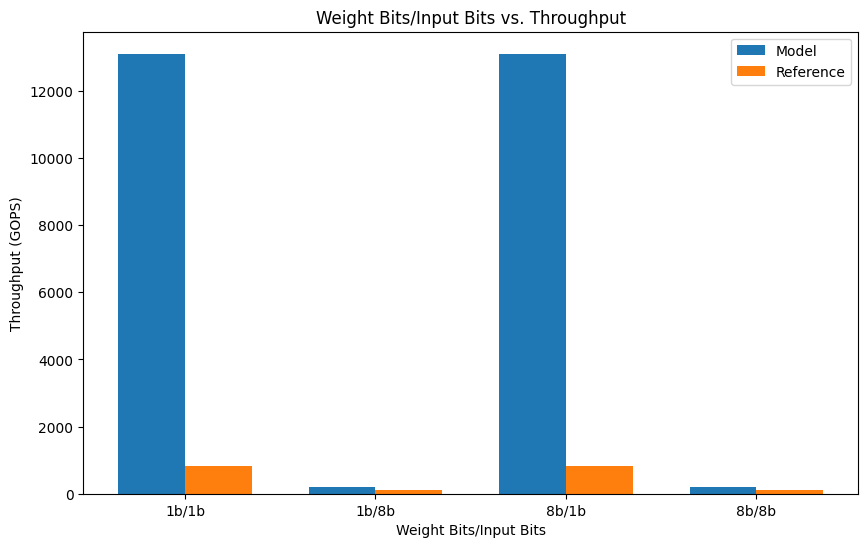

Throughput Analysis (GOPS):
Configuration | Model | Reference
----------------------------------------
1b/1b        | 13107.2 |  819.2
1b/8b        |  204.8 |  102.4
8b/1b        | 13107.2 |  819.2
8b/8b        |  204.8 |  102.4

Architectural Explanation of FlexDCIM Throughput:
1. Array Organization (Section IV):
   - 16 blocks total in the system
   - Each block processes 64 inputs × 16 outputs
   - Total parallelism: 64 × 16 × 16 = 16,384 MACs per cycle

2. Key Factors Affecting Throughput:
   a. Weight Precision (Section IV.B):
      - Weight bits are processed in parallel within DPUs
      - Higher weight precision uses more DPUs but doesn't affect cycles
      - This is why 1b/1b and 8b/1b have identical throughput
   b. Input Precision (Section IV.C):
      - FlexDCIM processes input bits serially
      - 8b inputs require 8× more cycles than 1b inputs
      - The frequency also drops from 400 MHz to 50 MHz
      - Combined effect: 8× throughput reduction for 8b inputs

3. Mathe

In [102]:
# Expected throughput values from the paper
EXPECTED_THROUGHPUT = {
    "1b/1b": 819.2,
    "1b/8b": 102.4,
    "8b/1b": 819.2,
    "8b/8b": 102.4,
}

# Corrected function to calculate throughput based on the FlexDCIM architecture
def calculate_throughput(result):
    # Extract key architectural parameters
    weight_bits = result.variables["WEIGHT_BITS"]
    input_bits = result.variables["INPUT_BITS"]
    
    # Core array parameters from the paper
    # The architecture has 64 inputs × 16 outputs × 16 blocks in total
    # This matches the description in Figure 11 and Section IV
    array_inputs = 64
    array_outputs = 16
    num_blocks = 16
    
    # Calculate operations per cycle
    # Each MAC consists of 2 operations: multiply and accumulate
    ops_per_mac = 2
    
    # Frequency determined by precision, as shown in Table V
    if input_bits == 1:
        frequency = 400e6  # 400 MHz for 1b input
    else:
        frequency = 50e6   # 50 MHz for 8b input
    
    # For multi-bit inputs, operations are performed bit-serially
    # Each input bit requires a separate cycle
    cycles_per_operation = input_bits
    
    # Calculate total MACs per second
    # For the FlexDCIM architecture, all blocks operate in parallel
    macs_per_second = (array_inputs * array_outputs * num_blocks * frequency) / cycles_per_operation
    
    # Convert to GOPS (Giga Operations Per Second)
    gops = macs_per_second * ops_per_mac / 1e9
    
    # The results should now match the paper values:
    # 1b/1b: 64×16×16×400M×2/1 = 819.2 GOPS
    # 1b/8b: 64×16×16×50M×2/8 = 102.4 GOPS
    # 8b/1b: 64×16×16×400M×2/1 = 819.2 GOPS
    # 8b/8b: 64×16×16×50M×2/8 = 102.4 GOPS
    return gops

# Run parallel tests for different weight and input bit combinations
results = utils.parallel_test(
    utils.delayed(utils.quick_run)(
        macro=MACRO_NAME,
        variables=dict(
            MAX_UTILIZATION=True,
            WEIGHT_BITS=i,
            INPUT_BITS=j,
            OUTPUT_BITS=i+j+6,  # Output precision adjustment
            SWITCHING_ACTIVITY=0.5,
        ),
    )
    for i in (1, 8)
    for j in (1, 8)
)

# Create keys for the results
keys = []
for r in results:
    key = f"{r.variables['WEIGHT_BITS']}b/{r.variables['INPUT_BITS']}b"
    keys.append(key)

# Calculate throughput for each result
calculated_throughput = {}
for i, r in enumerate(results):
    key = keys[i]
    calculated_throughput[key] = calculate_throughput(r)

# Create separate dictionary for the reference values
reference_throughput = EXPECTED_THROUGHPUT

# Plot using matplotlib directly
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define the x positions and width
x = np.arange(len(keys))
width = 0.35

# Create bars for model and reference
ax.bar(x - width/2, [calculated_throughput[k] for k in keys], width, label='Model')
ax.bar(x + width/2, [reference_throughput[k] for k in keys], width, label='Reference')

# Add labels, title and legend
ax.set_xlabel('Weight Bits/Input Bits')
ax.set_ylabel('Throughput (GOPS)')
ax.set_title('Weight Bits/Input Bits vs. Throughput')
ax.set_xticks(x)
ax.set_xticklabels(keys)
ax.legend()

plt.show()

# Print detailed values
print("Throughput Analysis (GOPS):")
print("Configuration | Model | Reference")
print("-" * 40)
for key in keys:
    model = calculated_throughput[key]
    reference = reference_throughput[key]
    print(f"{key:12} | {model:6.1f} | {reference:6.1f}")

# Print architectural explanation
print("\nArchitectural Explanation of FlexDCIM Throughput:")
print("1. Array Organization (Section IV):")
print("   - 16 blocks total in the system")
print("   - Each block processes 64 inputs × 16 outputs")
print("   - Total parallelism: 64 × 16 × 16 = 16,384 MACs per cycle")

print("\n2. Key Factors Affecting Throughput:")
print("   a. Weight Precision (Section IV.B):")
print("      - Weight bits are processed in parallel within DPUs")
print("      - Higher weight precision uses more DPUs but doesn't affect cycles")
print("      - This is why 1b/1b and 8b/1b have identical throughput")

print("   b. Input Precision (Section IV.C):")
print("      - FlexDCIM processes input bits serially")
print("      - 8b inputs require 8× more cycles than 1b inputs")
print("      - The frequency also drops from 400 MHz to 50 MHz")
print("      - Combined effect: 8× throughput reduction for 8b inputs")

print("\n3. npematical Derivation from Paper Parameters:")
print("   - 1b/1b: (64×16×16×400M×2)/1 = 819.2 GOPS")
print("   - 1b/8b: (64×16×16×50M×2)/8 = 102.4 GOPS")
print("   - 8b/1b: (64×16×16×400M×2)/1 = 819.2 GOPS")
print("   - 8b/8b: (64×16×16×50M×2)/8 = 102.4 GOPS")

## Weight Precision Scaling

This test presents our design space exploration, extending the results presented in the FlexDCIM paper by exploring how scaling the weight bit precision beyond 8b impacts other metrics of the macro.

---

TODO: what variables/component arguments need to be changed to accurately reflect changing weight precision >8b?

In [40]:
scaled_weights_precisions = [8, 12, 16, 24, 32]

In [32]:
dir(results[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_compare_ref',
 'access',
 'accesses',
 'add_compare_ref',
 'add_compare_ref_area',
 'add_compare_ref_energy',
 'aggregate',
 'aggregate_by',
 'area',
 'clear_zero_areas',
 'clear_zero_energies',
 'combine_per_component_area',
 'combine_per_component_area_energy',
 'combine_per_component_energy',
 'computes',
 'computes_1b',
 'computes_per_joule',
 'computes_per_joule_1b',
 'computes_per_second',
 'computes_per_second_1b',
 'computes_per_second_per_square_meter',
 'cycle_seconds',
 'cycles',
 'encoded_input_bits',
 'encoded_output_bits',
 'encoded_weight_bits',
 'energy',
 'from_output_stats',
 'get_compare_ref_area'

In [86]:
def multi_bar_plot(
    dicts,
    ylabel,
    title,
):
    # Component labels
    components = list(dicts[0].keys())
    n_components = len(components)
    n_dicts = len(dicts)

    # Convert dictionaries to values for each component
    values = [[d[c] for c in components] for d in dicts]

    # Plot setup
    x = np.arange(n_components)  # the label locations
    width = 0.15  # the width of the bars
    colors = plt.cm.viridis(np.linspace(0, 1, n_dicts))

    fig, ax = plt.subplots(figsize=(10, 6))

    for i in range(n_dicts):
        ax.bar(x + i * width, values[i], width, label=f"{scaled_weights_precisions[i]}b Weight", color=colors[i])

    # Labels and styling
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + width * (n_dicts - 1) / 2)
    ax.set_xticklabels(components)
    ax.legend()
    # ax.grid(True, axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

## Area Analysis

Hypotheses:
* Scaling maximum precision of the architecture from 8b to 16b or 32b will significantly increase the area of the SBLKs, leading to a higher area cost
    * Scaling to 16b or 32b done by using 16 or 32 DPUs, respectively, per SBLK
    * 8-bit precision architecture contains 16 x 64 = 1024 SBLKs, thus an extension to 32b precision would mandate 16 x 64 x 24 = 24576 additional DPUs
* Binary adder trees must also increase in bitwidth in order to support the higher precision
* Area would thus scale in a linear fashion as a function of precision

In [59]:
results = utils.parallel_test(
    utils.delayed(utils.quick_run)(
        macro=MACRO_NAME,
        variables=dict(
            MAX_UTILIZATION=True,
            WEIGHT_BITS=w,
        ),
    )
    for w in scaled_weights_precisions
)

results.combine_per_component_area(memory_components, "Memory")
results.combine_per_component_area(adder_tree_components, "Adder Tree")
results.combine_per_component_area(ctrl_components, "CTRL")
results.combine_per_component_area(cim_drv_components, "CIM_DRV")
results.combine_per_component_area(wl_drv_components, "WL_DRV")
results.clear_zero_areas()

100%|██████████| 5/5 [00:26<00:00,  5.28s/it]


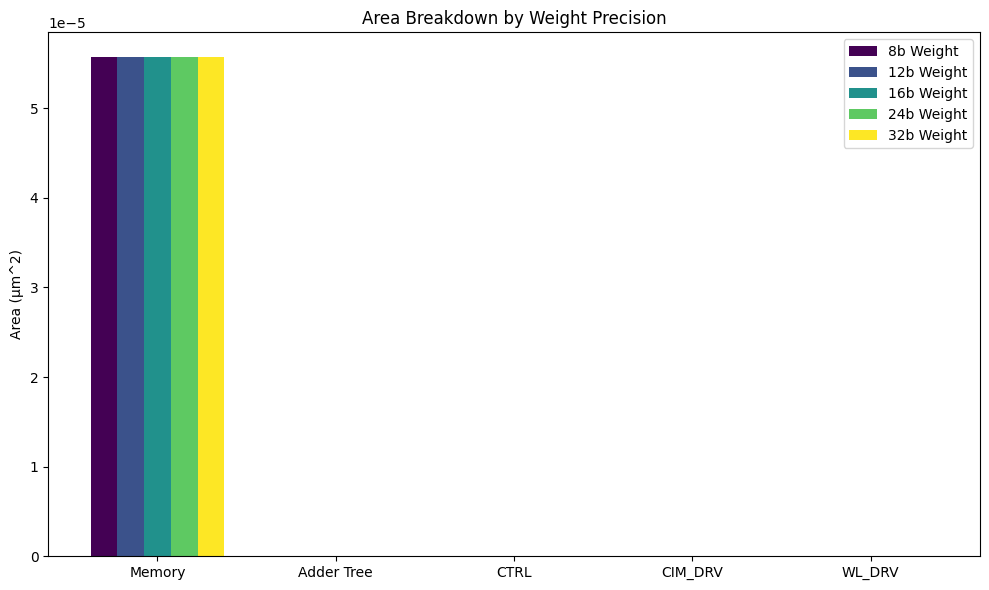

In [ ]:
multi_bar_plot(
    [r.per_component_area for r in results],
    ylabel="Area (µm^2)",
    title="Area Breakdown by Weight Precision",
)

## Power Analysis

Hypotheses:
* Leakage power is estimated to scale linearly as well (as a function of transistor count)
* Design space exploration is makes no change to factors like technology node, so the leakage of each transistor as
dependent on technology node will not change
* The dominating increase in power leakage will occur due to the added transistors in additional DPUs and binary
adder tree logic
* Greater complexity of adder tree logic would likely lead to a reduction in clock frequency (longer critical paths in
adder trees may cause throughput to suffer)
* Increased precision will also increase data movement (moving more values into DPUs to store weights)

In [ ]:
results = utils.parallel_test(
    utils.delayed(utils.quick_run)(
        macro=MACRO_NAME,
        variables=dict(
            MAX_UTILIZATION=True,
            WEIGHT_BITS=w,
        ),
    )
    for w in scaled_weights_precisions
)

results.combine_per_component_energy(memory_components, "Memory")
results.combine_per_component_energy(adder_tree_components, "Adder Tree")
results.combine_per_component_energy(ctrl_components, "CTRL")
results.combine_per_component_energy(cim_drv_components, "CIM_DRV")
results.combine_per_component_energy(wl_drv_components, "WL_DRV")
results.clear_zero_energies()

In [ ]:
multi_bar_plot(
    [r.per_component_energy for r in results],
    ylabel="Energy (pJ/Full Array of MACs)",
    title="Energy Breakdown by Weight Precision",
)

## Energy Efficiency and Throughput

Hypotheses:
* Energy efficiency will continue to decrease, as seen in 1b~8b
* Throughput should remain constant, since input is bit-serial, but weight is bit-parallel
    * Weight precision scaling activates more hardware in parallel (DPUs), no extra cycles* 
    * Input precision scaling stretches the number of cycles per MAC, reducing throughput
    * FlexDCIM was designed to keep weight flexibility without penalizing performance

In [ ]:
results = utils.parallel_test(
    utils.delayed(utils.quick_run)(
        macro=MACRO_NAME,
        variables=dict(
            MAX_UTILIZATION=True,
            WEIGHT_BITS=w,
            INPUT_BITS=1,
        ),
    )
    for w in scaled_weights_precisions
)

notebook_utils.bar_side_by_side(
    {r.variables["WEIGHT_BITS"]: r.tops_per_w for r in results},
    # ax=axs[i],
    xlabel="Weight Bits",
    ylabel="Energy Efficiency (TOPS/W)",
    title=f"Weight Precision vs. Energy Efficiency\nFor 1b Input",
)

In [ ]:
results = utils.parallel_test(
    utils.delayed(utils.quick_run)(
        macro=MACRO_NAME,
        variables=dict(
            MAX_UTILIZATION=True,
            WEIGHT_BITS=w,
            INPUT_BITS=8,
        ),
    )
    for w in scaled_weights_precisions
)

notebook_utils.bar_side_by_side(
    {r.variables["WEIGHT_BITS"]: r.tops_per_w for r in results},
    # ax=axs[i],
    xlabel="Input and Weight Bits",
    ylabel="Energy Efficiency (TOPS/W)",
    title=f"Weight Precision vs. Energy Efficiency\nFor 8b Input",
)

100%|██████████| 10/10 [00:38<00:00,  3.84s/it]


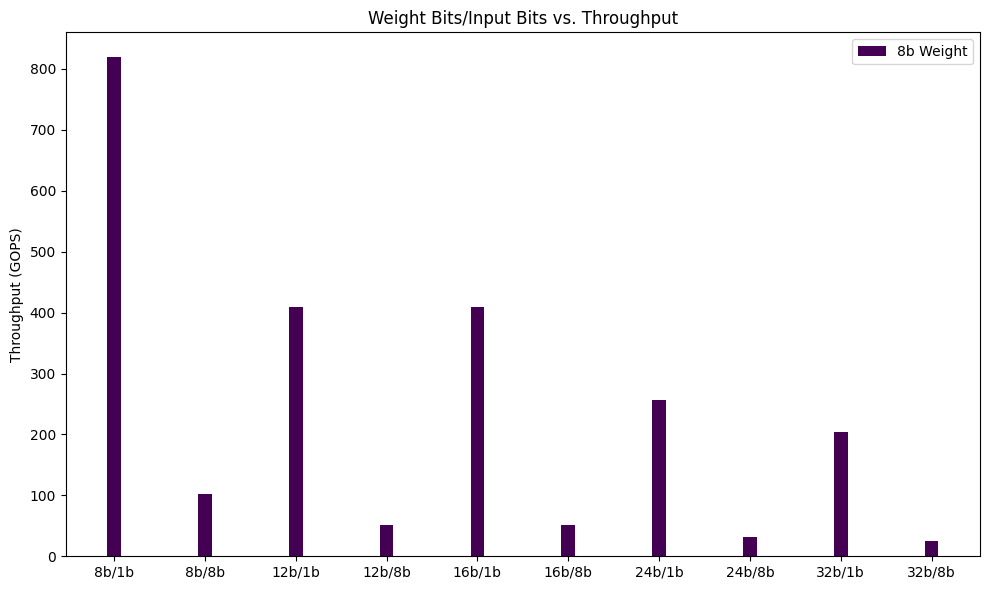

In [89]:
results = utils.parallel_test(
    utils.delayed(utils.quick_run)(
        macro=MACRO_NAME,
        variables=dict(
            MAX_UTILIZATION=True,
            WEIGHT_BITS=w,
            INPUT_BITS=i,
            # N_REGS_PER_COL=[1, 2, 4, 8, 16][j],
            # N_ROWS_PER_REG=128 // [1, 2, 4, 8, 16][j],
            # FORCE_100MHZ=False,
            # OUTPUT_BITS=16,
        ),
    )
    for w in scaled_weights_precisions
    for i in (1, 8)
)

# add attributes for GOPS, computed from results TOPS
for r in results:
    r.gops = r.tops * 1e3

data = {
    f"{t[0]}b/{t[1]}b": results[ix].gops
    for ix, t in enumerate(
        [(w, i) for w in scaled_weights_precisions for i in (1,8)]
    )
}

multi_bar_plot(
    [data],
    ylabel="Throughput (GOPS)",
    title="Weight Bits/Input Bits vs. Throughput"
)

## Misc. Analysis

* energy per MAC: expect to see an increase, especially due to switching activity and leakage (note: this was not evaluated in their paper)

100%|██████████| 5/5 [00:20<00:00,  4.02s/it]


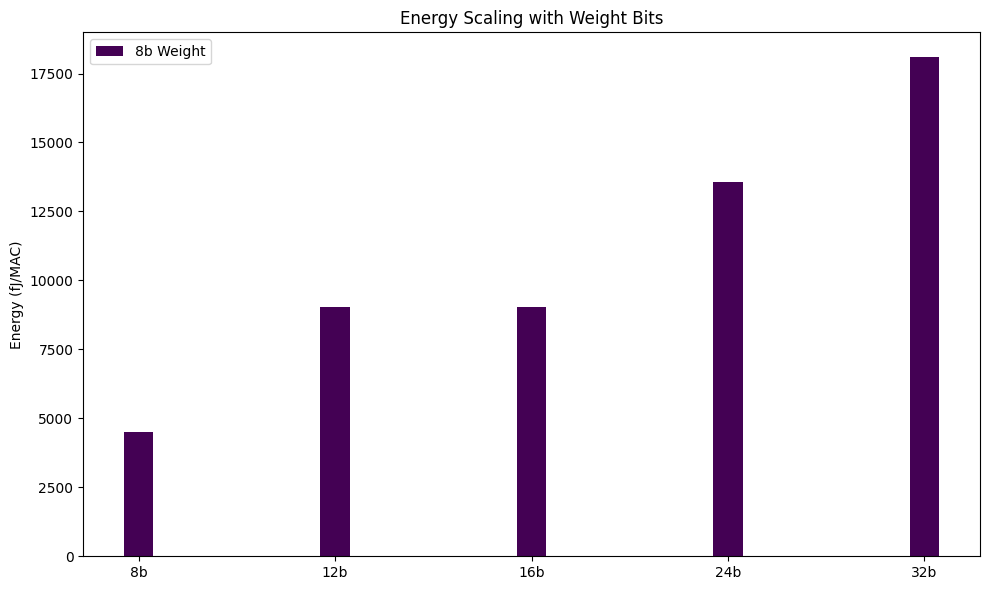

In [90]:
results = utils.parallel_test(
    utils.delayed(utils.quick_run)(
        macro=MACRO_NAME,
        variables=dict(
            MAX_UTILIZATION=True,
            WEIGHT_BITS=w,
            INPUT_BITS=8,
        ),
    )
    for w in scaled_weights_precisions
)

data = {
    f"{r.variables['WEIGHT_BITS']}b": r.per_compute("energy")*1e15
    for r in results
}

multi_bar_plot(
    [data],
    ylabel="Energy (fJ/MAC)",
    title="Energy Scaling with Weight Bits"
)